Предметная область: Автомобильная промышленность, оценка производительности и экономичности транспортных средств.

Источник данных: UCI Machine Learning Repository - набор данных Automobile Data Set, а также его версия, опубликованная на Kaggle (https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset). Данные были собраны из различных автомобильных журналов и справочников в рамках анализа топливной эффективности автомобилей.

Характер данных: Реальные данные, собранные по автомобилям различных производителей и моделей за период с 1970 по 1982 год. Каждая строка представляет собой данные отдельного автомобиля. Все признаки, кроме названия и страны происхождения, являются количественными.


Описание атрибутов: 
name - строковый (категориальный): Название модели автомобиля. Является уникальным идентификатором.
mpg - числовой (float): Расход топлива в миллях на галлон (Miles Per Gallon). 
cylinders - числовой (int): Количество цилиндров двигателя.
displacement - числовой (float): Рабочий объем двигателя (в кубических дюймах).
horsepower - числовой (float): Мощность двигателя в лошадиных силах.
weight - числовой: Вес автомобиля (в фунтах).
acceleration - чилсовой (float): Время разгона от 0 до 60 миль в час (в секундах).
model_year - числовой (int): Год выпуска модели (две последние цифры года).
origin - категориальный (object): Страна или регион происхождения автомобиля (USA, Europe, Japan).


Описание задачи анализа: Набор данных подходит для решения нескольких классических задач машинного обучения. Основной задачей является регрессия - предсказание числового значения расхода топлива (mpg) на основании физических характеристик автомобиля. Также датасет можно использовать для классификации (например, предсказание страны происхождения origin) и кластеризации (сегментация автомобилей на группы по схожим параметрам).

Для рассчета средних значений и ско используется библиотека pandas. df.describe() автоматически вычисляет эти метрики длля всех числовых признаков. mean() и std() позволяют получить среднее и ско отдельно для каждого столбца. 

In [6]:
import pandas as pd

# Загружаем датасет
df = pd.read_csv("Automobile.csv")

# Первичный статистический анализ
mean_values = df.mean(numeric_only = True)
std_values = df.std(numeric_only = True)

print("Средние значения:")
print(mean_values)
print("СКО:")
print(std_values)

Средние значения:
mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.469388
weight          2970.424623
acceleration      15.568090
model_year        76.010050
dtype: float64
СКО:
mpg               7.815984
cylinders         1.701004
displacement    104.269838
horsepower       38.491160
weight          846.841774
acceleration      2.757689
model_year        3.697627
dtype: float64


Построим гистограммы распределения значений для всех числовых признаков, используя также Matplotlib. Функция df.hist() автоматически создаёт сетку графиков, по одному для каждого числового столбца.

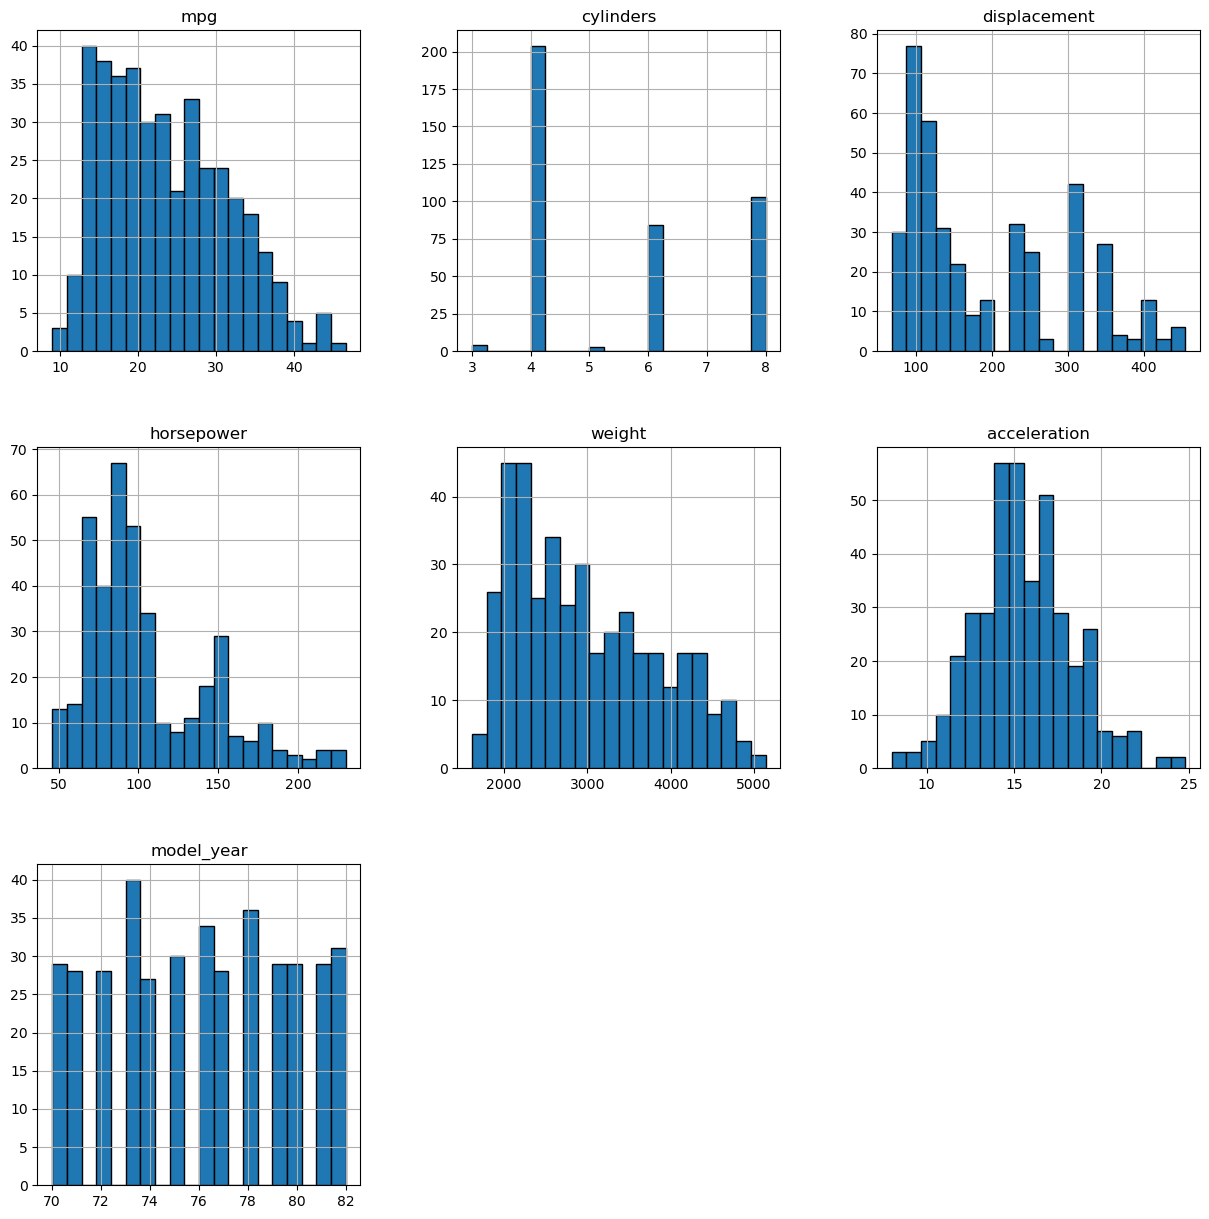

In [8]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 15), bins=20, edgecolor='black')
plt.show()

Для определения выбросов построим boxplot (ящики с усами) для всех числовых переменных. Точки, расположенные за пределами усов, могут указывать на потенциальные выбросы.

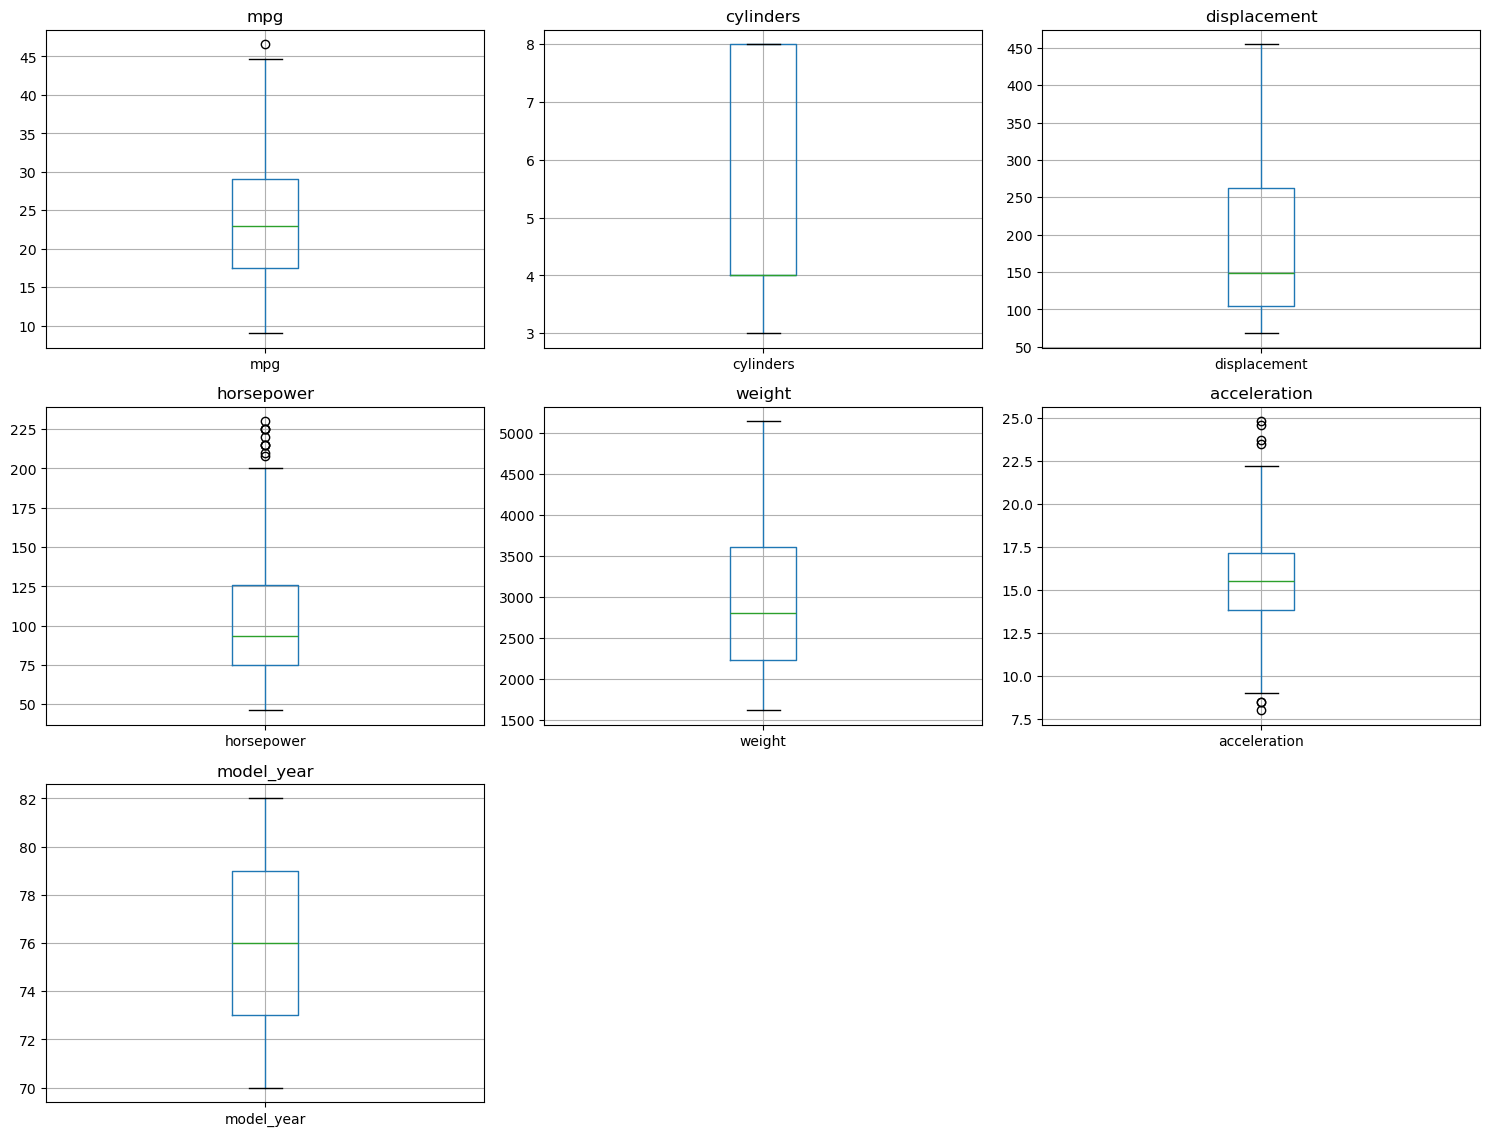

In [17]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns

# Сетка графиков 4x3 и отдельный boxplot для каждого признака
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    df.boxplot(column=col)
    plt.title(col)
    plt.tight_layout()
plt.show()



На диаграммах видно, что в признаках horsepower, weight и acceleration присутствуют значения, выходящие за пределы основного диапазона. Это могут быть выбросы, возникающие из-за экстремальных характеристик отдельных моделей.

Для поиска пропущенных значений используем isna().sum().

In [18]:
df.isna().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Пропущенные значения обнаружены только в столбце horsepower (6 NaN).

Предложение по обработке запросов: Поскольку признак horsepower является количественным и важным для анализа, удалять записи нецелесообразно. Оптимальным подходом является замена пропусков на среднее значение по столбцу (или медиану). Медиана является более устойчивой к выбросам, но, учитывая небольшое количество пропусков, среднее значение также является приемлемым. В данной работе пропущенные значения в столбце horsepower заменятся средним арифметическим. Для этого будет использоваться функция fillna() библиотеки pandas.

In [22]:
mean_hp = df['horsepower'].mean()
df['horsepower'] = df['horsepower'].fillna(mean_hp)

#Проверяем наличие пропусков после замены
print(df.isna().sum())

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


После заполнения пропусков столбец horsepower стал полным. Теперь можно использовать датасет для дальнейших этапов анализа (например, расчёта корреляции).

Для проведения корелляционного анализа используется коэффициент корелляции Пирсона, который показывает силу и направление линейной зависимости между признаками. Значения коэффициента r интерпретируются следующим образом: (<0.2) -практически отсутствует, (0.2-0.4) - слабая, (0.4-0.7) - умеренная, (0.7-0.9) - сильная, (>=0.9) - очень сильная.

Для рассчета корелляции используем метод df.corr() и визуализируем результаты при помощи тепловой карты (seaborn.jeatmap()).

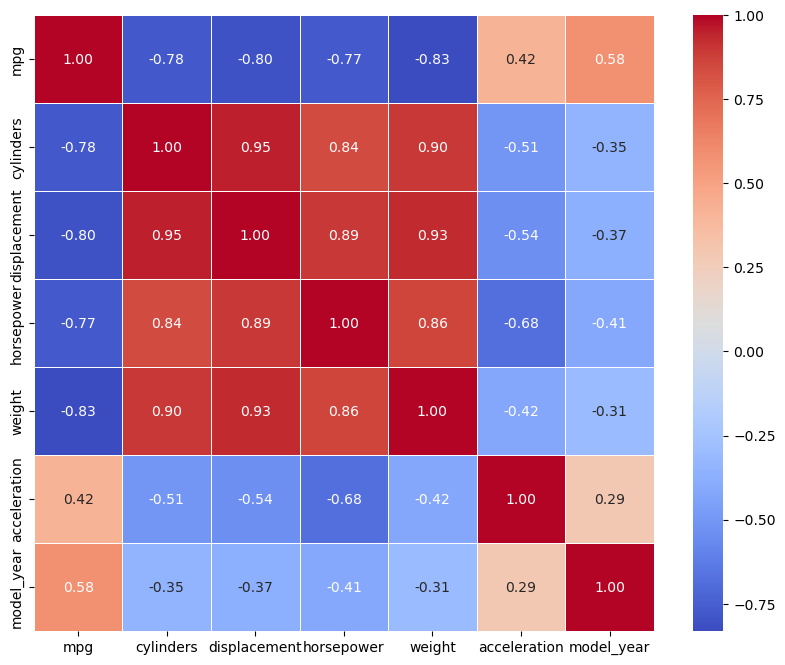

In [24]:
import seaborn as sns

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

На тепловой карте видно, что наиболее выраженная отрицательная корреляция наблюдается между признаками: mpg и weight (чем тяжелее автомобиль, тем выше расход топлива); mpg и displacement (чем больше объём двигателя, тем меньше экономичность); mpg и horsepower (чем мощнее двигатель, тем выше расход).

Положительные корреляции видны между: displacement и horsepower (логично: чем больше двигатель, тем выше мощность); weight и displacement (тяжёлые автомобили, как правило, имеют более объёмные двигатели); weight и horsepower (мощные автомобили часто тяжелее).

Формальное разделение пар на группы по силе связи:

In [25]:
strong, moderate, weak, none = [], [], [], []

for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        r = corr.iloc[i, j]
        abs_r = abs(r)
        pair = (corr.columns[i], corr.columns[j], round(r, 3))

        if abs_r >= 0.7:
            strong.append(pair)
        elif abs_r >= 0.4:
            moderate.append(pair)
        elif abs_r >= 0.2:
            weak.append(pair)
        else:
            none.append(pair)

print("\nСильная корреляция (|r| ≥ 0.7):")
print(pd.DataFrame(strong, columns=["Переменная 1", "Переменная 2", "r"]))

print("\nУмеренная корреляция (0.4 ≤ |r| < 0.7):")
print(pd.DataFrame(moderate, columns=["Переменная 1", "Переменная 2", "r"]))

print("\nСлабая корреляция (0.2 ≤ |r| < 0.4):")
print(pd.DataFrame(weak, columns=["Переменная 1", "Переменная 2", "r"]))

print("\nБез корреляции (|r| < 0.2):")
print(pd.DataFrame(none, columns=["Переменная 1", "Переменная 2", "r"]))



Сильная корреляция (|r| ≥ 0.7):
   Переменная 1  Переменная 2      r
0           mpg     cylinders -0.775
1           mpg  displacement -0.804
2           mpg    horsepower -0.771
3           mpg        weight -0.832
4     cylinders  displacement  0.951
5     cylinders    horsepower  0.839
6     cylinders        weight  0.896
7  displacement    horsepower  0.894
8  displacement        weight  0.933
9    horsepower        weight  0.861

Умеренная корреляция (0.4 ≤ |r| < 0.7):
   Переменная 1  Переменная 2      r
0           mpg  acceleration  0.420
1           mpg    model_year  0.579
2     cylinders  acceleration -0.505
3  displacement  acceleration -0.544
4    horsepower  acceleration -0.684
5    horsepower    model_year -0.412
6        weight  acceleration -0.417

Слабая корреляция (0.2 ≤ |r| < 0.4):
   Переменная 1 Переменная 2      r
0     cylinders   model_year -0.349
1  displacement   model_year -0.370
2        weight   model_year -0.307
3  acceleration   model_year  0.288

Без 

Для наглядной визуализации связей между признаками построим матрицу графиков рассеивания (sns.pairplot()).

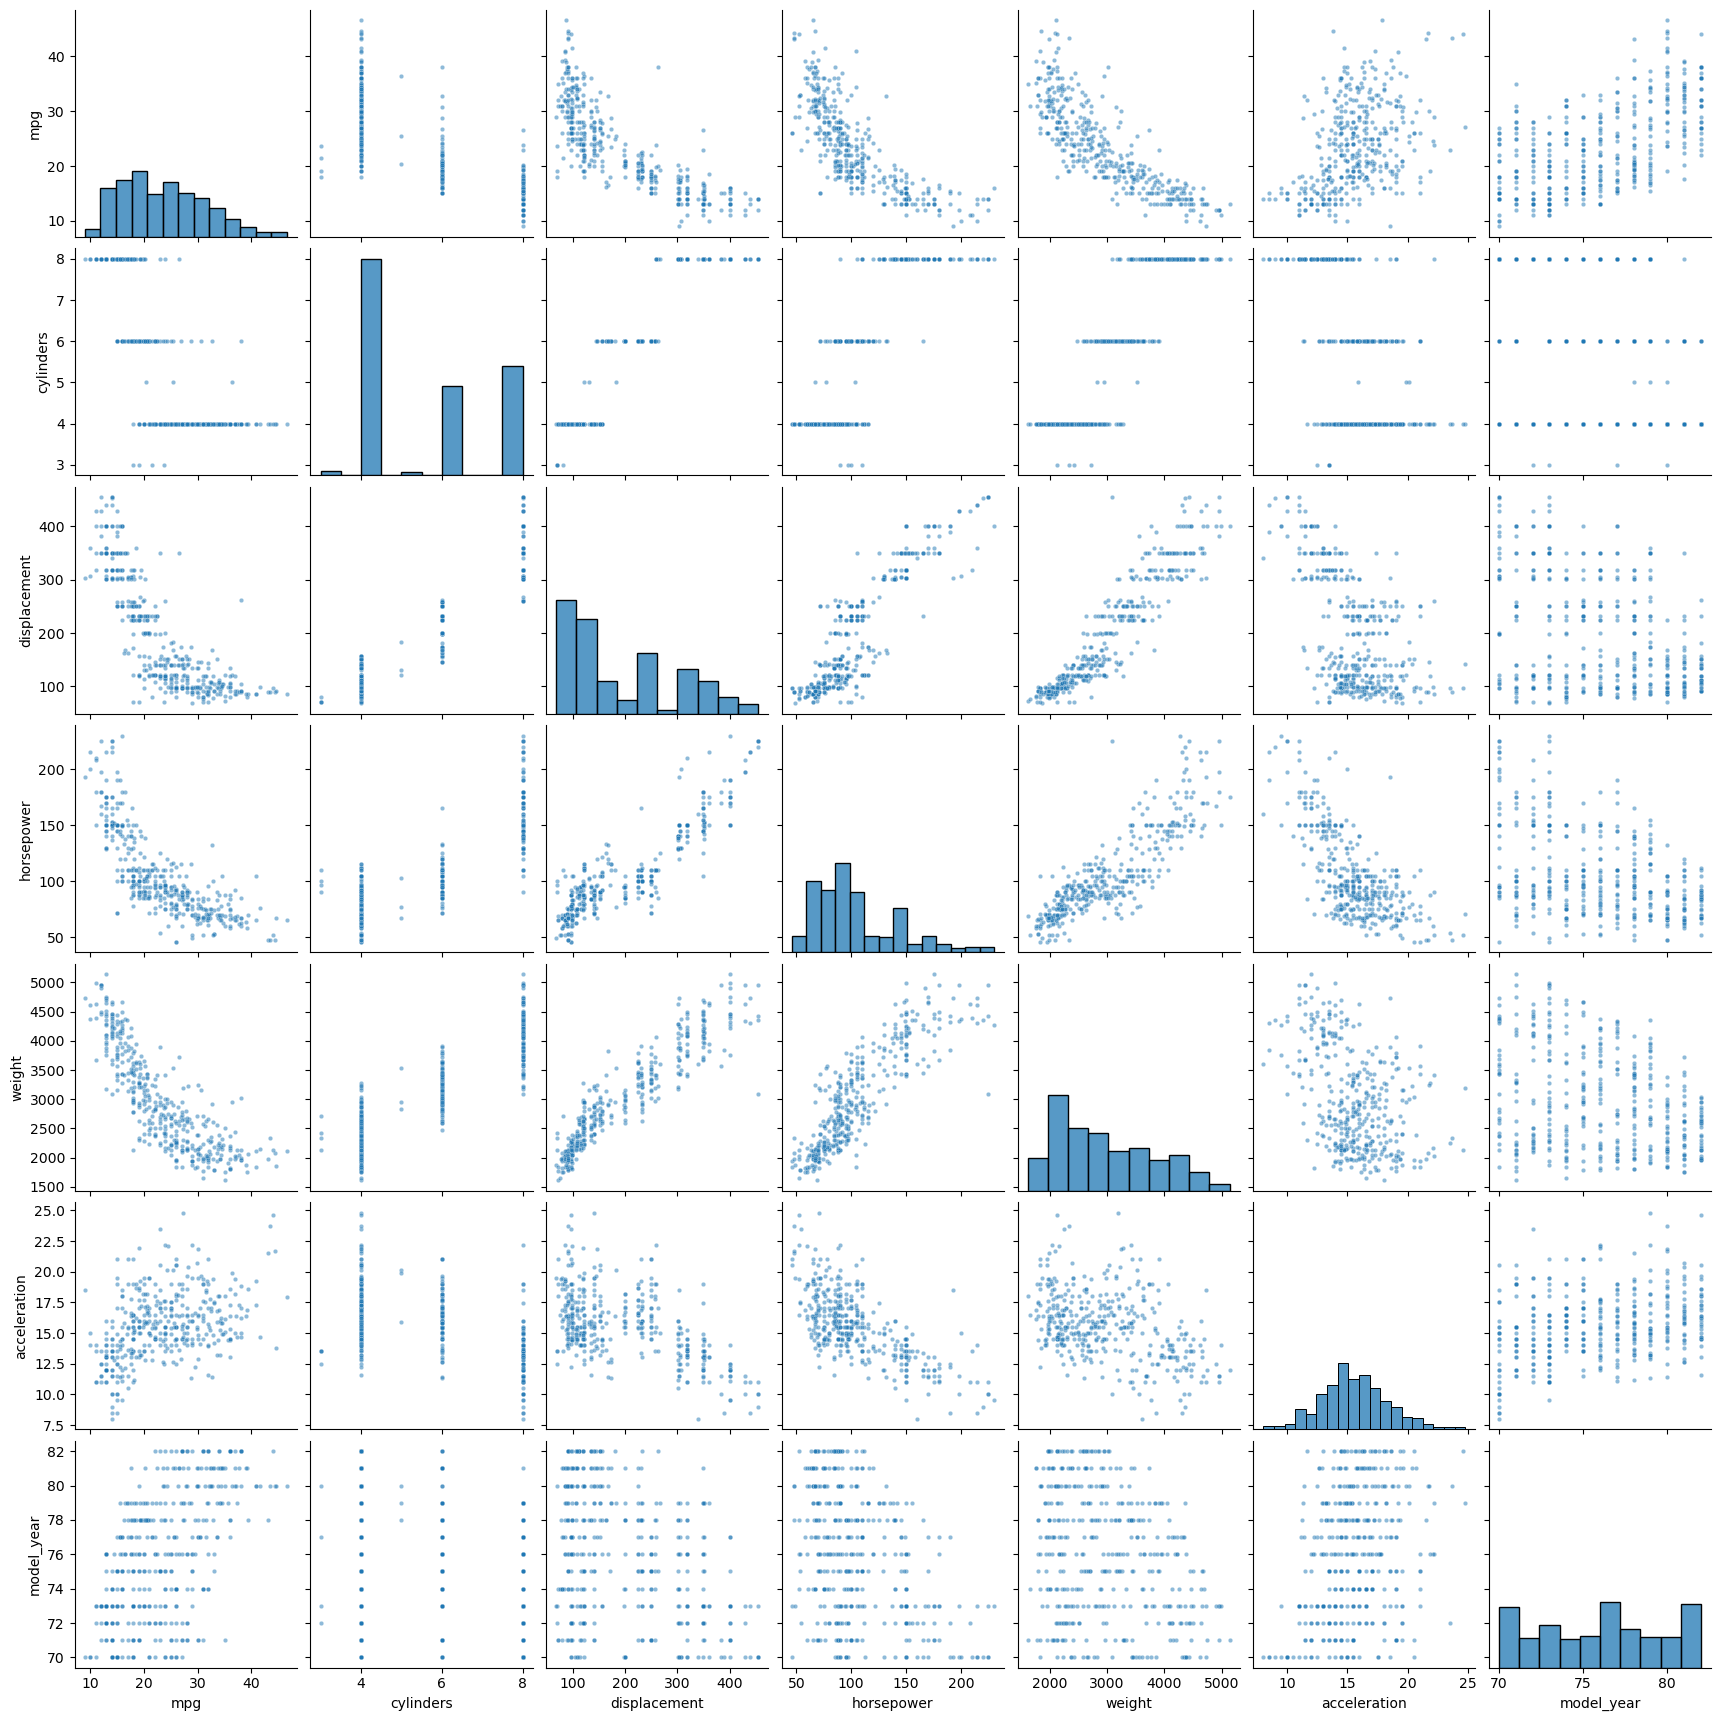

In [26]:
sns.pairplot(df, diag_kind='hist', plot_kws={'s': 10, 'alpha': 0.5})
plt.show()

Корреляционный анализ показал, что между большинством технических характеристик автомобилей существует логичная и физически объяснимая взаимосвязь.

Наиболее сильная отрицательная корреляция наблюдается между расходом топлива (mpg) и параметрами, отражающими массу и мощность автомобиля (weight, horsepower, displacement, cylinders).
Это отражает реальную закономерность: чем тяжелее и мощнее автомобиль, тем выше его топливное потребление.

Сильная положительная корреляция обнаружена между параметрами, связанными с конструкцией двигателя и массой машины:
displacement, horsepower, weight и cylinders.
Большие и тяжёлые автомобили, как правило, оснащены двигателями большего объёма и мощности, что приводит к высокому уровню положительной зависимости между этими переменными.

Умеренные положительные корреляции наблюдаются между mpg и model_year, что отражает тенденцию к повышению топливной эффективности с годами — более новые модели демонстрируют меньший расход топлива.
Отрицательные умеренные зависимости между acceleration и параметрами мощности и массы показывают, что более тяжёлые и мощные автомобили, несмотря на их двигательную силу, часто обладают меньшим ускорением в стандартном диапазоне (0–60 mph).

Слабые корреляции между model_year и другими параметрами (в диапазоне –0.3…–0.4) также логичны: с течением времени автомобили становились легче и экономичнее, что подтверждается историческими тенденциями развития автомобильной промышленности.

Вывод: В ходе проведённого анализа датасета Automobile установлено, что набор данных является корректным, информативным и пригодным для дальнейшего применения методов машинного обучения.
Пропущенные значения обнаружены только в одном признаке (horsepower) и были успешно обработаны путём замены средним значением.
Проведённые расчёты и визуализация показали наличие сильных и умеренных корреляций между техническими характеристиками автомобилей, которые имеют физически объяснимый характер.
Данные отражают реальные зависимости между массой, объёмом двигателя, мощностью и экономичностью транспортных средств.